In [6]:
import pandas as pd
from datasets import load_dataset, Dataset
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import json

## Load Datasets

In [20]:
!pip install --upgrade datasets fsspec

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 491.5/491.5 kB 9.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 193.6/193.6 kB 12.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" an

## **Arabic Dataset Evaluation**

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#arabic_df = pd.read_csv("/content/drive/MyDrive/arabic_train.csv")
arabic_df = pd.read_csv("/content/drive/MyDrive/ar_hf.csv")

In [9]:
arabic_df

text  labels   source  \
0       ÿßŸÑŸàÿ≤Ÿäÿ± ÿ¨ÿ®ÿ±ÿßŸÜ ÿ®ÿßÿ≥ŸäŸÑ ÿ™ÿßÿ¨ ÿ±ÿßÿ≥ŸÉ Ÿäÿß ÿ¨ÿ±ÿ®ÿßŸÜ ŸÖŸÖŸÜŸàÿπ ÿ®ÿπÿØ...     0.0  Twitter   
1       ÿµÿØŸäŸÇŸä ÿßŸÜÿ™ ÿßÿ®ŸÜ ÿ¨ÿßŸÖÿπŸá ÿßŸÑŸÑÿπÿ®Ÿá ÿßŸÉÿ®ÿ± ŸÖŸÜ ÿØÿßÿπÿ¥ ÿßŸÑŸÑÿπÿ®Ÿá...     0.0  Twitter   
2       Ÿà ŸÖÿµŸÑÿ≠ÿ© ŸÑÿ®ŸÜÿßŸÜ ÿ™ÿ®ÿØÿ£ ÿ®ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿßŸÑŸÜŸÅÿ∑ Ÿà ÿßŸÑÿ∫ÿßÿ≤ ŸÑŸàŸÇŸÅ...     0.0  Twitter   
3                         ŸàŸÑŸäÿØ ÿ¨ŸÜÿ®ŸÑÿßÿ∑ ŸÉÿßÿ™ÿ® ÿßŸÑÿ≠ŸÉŸÖÿ© Ÿäÿß ŸÇÿ∞ÿ±      0.0  Twitter   
4       ÿ¥Ÿà ÿ®ÿ™ŸÑÿ®ŸÇŸÑŸÉ ŸÉŸÑŸÖÿ© ÿÆŸÜÿ≤Ÿäÿ± ÿ®ÿ™ÿ¨Ÿä ŸÖŸÅÿµŸÑŸá ÿπŸÑŸâ ŸÇŸäÿßÿ≥ŸÉ Ÿàÿ¥ŸÉ...     0.0  Twitter   
...                                                   ...     ...      ...   
449073  @USER ÿ±ŸàŸÖÿß ŸÖÿ≠ÿ∏Ÿàÿ∏ŸäŸÜ ÿ®ÿ∞ÿß ÿßŸÑŸÖÿØÿ±ÿ® ÿ®Ÿäÿ±Ÿàÿ™Ÿä Ÿäÿ≥ÿ≠ÿ® ŸÅŸä ÿ±...     0.0  Twitter   
449074  @USER ŸáŸÑÿß ŸàÿßŸÑŸÑŸá ÿ®ÿßŸÑÿ≠ÿ®<LF>ŸáŸÑÿß ŸÑŸàŸÑŸà‚ù§Ô∏èüòô<LF>...<LF...     0.0  Twitter   
449075  ÿ±ŸäŸÜÿ≤ ŸÅÿßÿ≤ üò°üò°üò°üò°üò°üò°üò° ŸäÿπŸÜŸÜŸä ÿßŸàŸá ÿ¥ŸàŸÅŸà ÿßŸÑÿπÿ±ÿ∂ ÿßŸÑÿ£ÿ≥ÿ∑Ÿàÿ±Ÿä...     0.0  Twitter   
449076  @USER ŸäŸäŸäŸäÿπ ŸàÿßŸÑŸÑŸá ÿ¥Ÿäÿ° ŸäŸÑŸàÿπ ÿßŸÑŸÉÿ®ÿØ ŸÖÿ±Ÿäÿ∂ÿßÿ™ ÿßŸÑŸÑŸá Ÿä...     0.0  Twitter   
449077   @USER ÿ™ÿ≠ÿ≥ŸäŸÜŸáÿß ÿπ ŸÉŸÑŸäÿ¨Ÿá ŸÖ ÿßŸÉŸÑÿ™ ÿ¥Ÿä Ÿàÿßÿ∂ÿ≠ ŸÖŸÜ ÿßŸÑÿµŸàÿ™ üò∑üò∑     0.0  Twitter   

       dataset  nb_annotators post_author_country_location  
0       L-HSAB              3                      unknown  
1       L-HSAB              3                      unknown  
2       L-HSAB              3                      unknown  
3       L-HSAB              3                      unknown  
4       L-HSAB              3                      unknown  
...        ...            ...                          ...  
449073   OSACT              3                      unknown  
449074   OSACT              3                      unknown  
449075   OSACT              3                      unknown  
449076   OSACT              3                      unknown  
449077   OSACT              3                      unknown  

[449078 rows x 6 columns]

In [10]:
arabic_df['text'][2139]

'ÿπŸÖÿßÿØ ÿπÿ´ŸÖÿßŸÜ ŸÇÿßŸáÿ± ÿßÿ®ŸàÿßŸÇ ÿßŸÑŸÜÿ∏ÿßŸÖ ÿßŸÑÿ≥Ÿàÿ±Ÿä ŸàŸÑŸÖÿß Ÿàÿ¶ÿßŸÖ ÿßŸÑÿ≠ŸÖÿßÿ± Ÿäÿ≠ŸÉŸä '

In [11]:
arabic_df.columns

Index(['text', 'labels', 'source', 'dataset', 'nb_annotators',
       'post_author_country_location'],
      dtype='object')

In [12]:
arabic_df['labels'].value_counts()

labels
0.0    432532
1.0     16546
Name: count, dtype: int64

In [34]:
#keep non offensive columns
non_hate_arabic_text = arabic_df[arabic_df['labels'] == 0]
non_hate_arabic_text["hatespeech"] = 0
non_hate_arabic_text = non_hate_arabic_text[["text", "hatespeech"]]
non_hate_arabic_text = non_hate_arabic_text.reset_index(drop= True)
non_hate_arabic_text["language"] = "arabic"
non_hate_arabic_text["target"] = "not hate"
non_hate_arabic_text["directness"] = "normal"
non_hate_arabic_text["annotator_sentiment"] = "normal"
non_hate_arabic_text["group"] = "normal"

/tmp/ipython-input-34-1621198657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_hate_arabic_text["hatespeech"] = 0


In [35]:
non_hate_arabic_text

text  hatespeech  \
0       ÿßŸÑŸàÿ≤Ÿäÿ± ÿ¨ÿ®ÿ±ÿßŸÜ ÿ®ÿßÿ≥ŸäŸÑ ÿ™ÿßÿ¨ ÿ±ÿßÿ≥ŸÉ Ÿäÿß ÿ¨ÿ±ÿ®ÿßŸÜ ŸÖŸÖŸÜŸàÿπ ÿ®ÿπÿØ...           0   
1       ÿµÿØŸäŸÇŸä ÿßŸÜÿ™ ÿßÿ®ŸÜ ÿ¨ÿßŸÖÿπŸá ÿßŸÑŸÑÿπÿ®Ÿá ÿßŸÉÿ®ÿ± ŸÖŸÜ ÿØÿßÿπÿ¥ ÿßŸÑŸÑÿπÿ®Ÿá...           0   
2       Ÿà ŸÖÿµŸÑÿ≠ÿ© ŸÑÿ®ŸÜÿßŸÜ ÿ™ÿ®ÿØÿ£ ÿ®ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿßŸÑŸÜŸÅÿ∑ Ÿà ÿßŸÑÿ∫ÿßÿ≤ ŸÑŸàŸÇŸÅ...           0   
3                         ŸàŸÑŸäÿØ ÿ¨ŸÜÿ®ŸÑÿßÿ∑ ŸÉÿßÿ™ÿ® ÿßŸÑÿ≠ŸÉŸÖÿ© Ÿäÿß ŸÇÿ∞ÿ±            0   
4       ÿ¥Ÿà ÿ®ÿ™ŸÑÿ®ŸÇŸÑŸÉ ŸÉŸÑŸÖÿ© ÿÆŸÜÿ≤Ÿäÿ± ÿ®ÿ™ÿ¨Ÿä ŸÖŸÅÿµŸÑŸá ÿπŸÑŸâ ŸÇŸäÿßÿ≥ŸÉ Ÿàÿ¥ŸÉ...           0   
...                                                   ...         ...   
432527  @USER ÿ±ŸàŸÖÿß ŸÖÿ≠ÿ∏Ÿàÿ∏ŸäŸÜ ÿ®ÿ∞ÿß ÿßŸÑŸÖÿØÿ±ÿ® ÿ®Ÿäÿ±Ÿàÿ™Ÿä Ÿäÿ≥ÿ≠ÿ® ŸÅŸä ÿ±...           0   
432528  @USER ŸáŸÑÿß ŸàÿßŸÑŸÑŸá ÿ®ÿßŸÑÿ≠ÿ®<LF>ŸáŸÑÿß ŸÑŸàŸÑŸà‚ù§Ô∏èüòô<LF>...<LF...           0   
432529  ÿ±ŸäŸÜÿ≤ ŸÅÿßÿ≤ üò°üò°üò°üò°üò°üò°üò° ŸäÿπŸÜŸÜŸä ÿßŸàŸá ÿ¥ŸàŸÅŸà ÿßŸÑÿπÿ±ÿ∂ ÿßŸÑÿ£ÿ≥ÿ∑Ÿàÿ±Ÿä...           0   
432530  @USER ŸäŸäŸäŸäÿπ ŸàÿßŸÑŸÑŸá ÿ¥Ÿäÿ° ŸäŸÑŸàÿπ ÿßŸÑŸÉÿ®ÿØ ŸÖÿ±Ÿäÿ∂ÿßÿ™ ÿßŸÑŸÑŸá Ÿä...           0   
432531   @USER ÿ™ÿ≠ÿ≥ŸäŸÜŸáÿß ÿπ ŸÉŸÑŸäÿ¨Ÿá ŸÖ ÿßŸÉŸÑÿ™ ÿ¥Ÿä Ÿàÿßÿ∂ÿ≠ ŸÖŸÜ ÿßŸÑÿµŸàÿ™ üò∑üò∑           0   

       language    target directness annotator_sentiment   group  
0        arabic  not hate     normal              normal  normal  
1        arabic  not hate     normal              normal  normal  
2        arabic  not hate     normal              normal  normal  
3        arabic  not hate     normal              normal  normal  
4        arabic  not hate     normal              normal  normal  
...         ...       ...        ...                 ...     ...  
432527   arabic  not hate     normal              normal  normal  
432528   arabic  not hate     normal              normal  normal  
432529   arabic  not hate     normal              normal  normal  
432530   arabic  not hate     normal              normal  normal  
432531   arabic  not hate     normal              normal  normal  

[432532 rows x 7 columns]

In [36]:
# keep 5000 rows
non_hate_arabic_text = non_hate_arabic_text.sample(n=5000, random_state=42)
non_hate_arabic_text = non_hate_arabic_text.reset_index(drop = True)
non_hate_arabic_text

text  hatespeech language  \
0     ÿ±Ÿèÿ∫ŸÖ ŸÇŸèÿ®ŸÑÿ™Ÿá ÿßŸÑÿ•ÿπÿ™ÿ∞ÿßÿ± ŸÑŸáÿß ÿå ŸÑŸÉŸÜŸáÿß ŸÖÿß ÿ≤ÿßŸÑÿ™ ŸÖŸèÿπÿ±ÿ∂...           0   arabic   
1     ŸÇÿßŸÑ ÿ±ÿ≥ŸàŸÑ ÿßŸÑŸÑŸá Ô∑∫ : . ÿπŸÑŸäŸÉŸé ÿ®ÿßŸÑÿ±ŸêŸëŸÅŸÇŸê ÿõ ŸÅÿ•ŸÜŸéŸëŸáŸè ...           0   arabic   
2     Ÿà ŸÑÿß ÿßŸÑŸÖÿßŸÜŸäÿß ŸàŸÑÿß ÿ®ÿ±Ÿäÿ∑ÿßŸÜŸäÿß Ÿà ŸÑÿß ÿßŸÖÿ±ŸäŸÉÿß ŸàŸÑÿß ÿ±Ÿàÿ≥Ÿä...           0   arabic   
3                                          ÿßŸä ŸÉÿ∞ÿ®Ÿá ŸÅŸäŸáŸÖ           0   arabic   
4     ÿ¥ŸÉÿ±Ÿãÿß ŸÑŸÑŸÜÿßÿ≥ ÿßŸÑŸÑŸä ŸÖÿπÿßŸÜÿß ÿ®ÿØŸàŸÜ ÿ£ÿ≥ÿ®ÿßÿ®ÿåÿ®ÿØŸàŸÜ ÿ¥ÿ±Ÿàÿ∑ÿåÿ®ÿØ...           0   arabic   
...                                                 ...         ...      ...   
4995           ÿßŸÜŸà ÿßŸÑŸáŸàÿ™ ÿØŸàÿ¨ ÿµÿßÿ± ŸÖŸÜ ÿ™ÿßÿ±ŸäÿÆ ÿßŸÖÿ±ŸäŸÉÿß ÿßŸÑÿ≠ÿØŸäÿ´           0   arabic   
4996  ŸàŸÑÿß ÿßÿ≠ŸÉŸä ŸÑŸÖÿß ÿßÿ¨Ÿäÿ® ÿßÿ∫ÿ±ÿßÿ∂ ŸÖŸÜ ŸÉÿßÿ±ŸÅŸàÿ± Ÿà ŸäŸÉŸàŸÜ ŸÖŸÜ ÿßŸÑ...           0   arabic   
4997  ŸÑÿß ŸàŸÑ ÿØÿßŸàŸÖŸä ÿßÿ±ÿ±ÿ≠ ŸÜÿ™ÿßÿÆÿ± ÿ®ŸÑŸäŸäŸäŸäÿ≤ ÿßŸÑŸä ÿ≤ŸÖÿßŸÜ ŸÖÿß ÿ¥ŸÅÿ™...           0   arabic   
4998                        ÿ®ÿ≠ÿ∂ÿ± ÿßŸÑŸäŸàŸÅŸä ŸàÿßŸÑŸÑÿπŸäÿ®ÿ© ŸÇÿßÿπÿØŸäŸÜ           0   arabic   
4999                             ŸÅŸä ÿ≠ŸÇÿØ ÿ∑ÿ®ŸÇŸä ŸÅŸä ÿßŸÑŸÖŸàÿ∂Ÿàÿπ           0   arabic   

        target directness annotator_sentiment   group  
0     not hate     normal              normal  normal  
1     not hate     normal              normal  normal  
2     not hate     normal              normal  normal  
3     not hate     normal              normal  normal  
4     not hate     normal              normal  normal  
...        ...        ...                 ...     ...  
4995  not hate     normal              normal  normal  
4996  not hate     normal              normal  normal  
4997  not hate     normal              normal  normal  
4998  not hate     normal              normal  normal  
4999  not hate     normal              normal  normal  

[5000 rows x 7 columns]

# **French Dataset**

In [15]:
import pandas as pd

french_df = pd.read_csv("/content/drive/MyDrive/fr_hf.csv")
french_df

text  labels target  \
0      On ne peut pas faire confiance aux musulmans c...       1  islam   
1         Les musulmans ne sont pas dignes de confiance.       1  islam   
2              Vous ne devriez pas croire les musulmans.       1  islam   
3      Les musulmans emp√™chent les gens de manger pen...       1  islam   
4      Les musulmans ne laissent pas les gens s'en pr...       1  islam   
...                                                  ...     ...    ...   
18066                         Kevin c√¢¬Ä¬ôest un sal noir.       1    NaN   
18067  bougnoule bamboula sale arabe , elle est belle...       1    NaN   
18068         @USER Tu viens de le traiter de sal noir ?       1    NaN   
18069                                      SAL NOIR LINK       1    NaN   
18070                                 Sal Noir LINK LINK       1    NaN   

        source dataset  nb_annotators  tweet_id  
0          NGO   CONAN              1       NaN  
1          NGO   CONAN              1       NaN  
2          NGO   CONAN              1       NaN  
3          NGO   CONAN              1       NaN  
4          NGO   CONAN              1       NaN  
...        ...     ...            ...       ...  
18066  Twitter     FTR              2       NaN  
18067  Twitter     FTR              2       NaN  
18068  Twitter     FTR              2       NaN  
18069  Twitter     FTR              2       NaN  
18070  Twitter     FTR              2       NaN  

[18071 rows x 7 columns]

<Axes: >

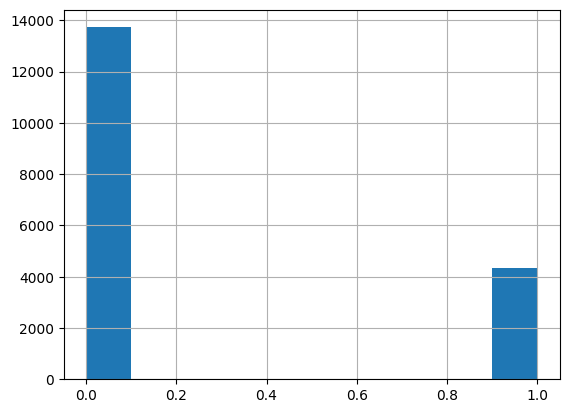

In [16]:
#labels: annotation of whether the post is hateful (== 1) or not (==0)
french_df['labels'].hist()

In [37]:
#keep non offensive columns
non_hate_french_text = french_df[french_df['labels'] == 0 ]
non_hate_french_text = non_hate_french_text[["text", "labels"]]
non_hate_french_text = non_hate_french_text.rename(columns={"labels": "hatespeech"})
non_hate_french_text = non_hate_french_text.reset_index(drop= True)
non_hate_french_text["language"] = "french"
non_hate_french_text["target"] = "not hate"
non_hate_french_text["directness"] = "normal"
non_hate_french_text["annotator_sentiment"] = "normal"
non_hate_french_text["group"] = "normal"

In [38]:
non_hate_french_text

text  hatespeech language  \
0       Alors julie t'ai d√©geulasse de sortir avec un...           0   french   
1                                 allo mme est homophobe           0   french   
2       on est pas ensemble d√©j√† puis m√™me si c'√©tait...           0   french   
3       laiss√© la tranquille elle n'est pas avec elle...           0   french   
4          mais assumer vous degouter bande de crasseuse           0   french   
...                                                  ...         ...      ...   
13726  j√¢¬Ä¬ôfrai jamais de tr√É¬™ve et tant pis si j√¢¬Ä¬ôe...           0   french   
13727  @USER Le dernier tweet que j√¢¬Ä¬ôai vu sur lui c...           0   french   
13728  "@USER @USER @USER @USER Prcic suffit √É¬† mon b...           0   french   
13729  18h17 c√¢¬Ä¬ôest le moment parfait pour que les c...           0   french   
13730  Ptn ya des gens ils sont tellement con le seul...           0   french   

         target directness annotator_sentiment   group  
0      not hate     normal              normal  normal  
1      not hate     normal              normal  normal  
2      not hate     normal              normal  normal  
3      not hate     normal              normal  normal  
4      not hate     normal              normal  normal  
...         ...        ...                 ...     ...  
13726  not hate     normal              normal  normal  
13727  not hate     normal              normal  normal  
13728  not hate     normal              normal  normal  
13729  not hate     normal              normal  normal  
13730  not hate     normal              normal  normal  

[13731 rows x 7 columns]

In [39]:
non_hate_french_text = non_hate_french_text.sample(n=5000, random_state=42)
non_hate_french_text = non_hate_french_text.reset_index(drop=True)

In [40]:
non_hate_ar_fr = pd.concat([non_hate_arabic_text, non_hate_french_text], ignore_index=True)
non_hate_ar_fr

text  hatespeech language  \
0     ÿ±Ÿèÿ∫ŸÖ ŸÇŸèÿ®ŸÑÿ™Ÿá ÿßŸÑÿ•ÿπÿ™ÿ∞ÿßÿ± ŸÑŸáÿß ÿå ŸÑŸÉŸÜŸáÿß ŸÖÿß ÿ≤ÿßŸÑÿ™ ŸÖŸèÿπÿ±ÿ∂...           0   arabic   
1     ŸÇÿßŸÑ ÿ±ÿ≥ŸàŸÑ ÿßŸÑŸÑŸá Ô∑∫ : . ÿπŸÑŸäŸÉŸé ÿ®ÿßŸÑÿ±ŸêŸëŸÅŸÇŸê ÿõ ŸÅÿ•ŸÜŸéŸëŸáŸè ...           0   arabic   
2     Ÿà ŸÑÿß ÿßŸÑŸÖÿßŸÜŸäÿß ŸàŸÑÿß ÿ®ÿ±Ÿäÿ∑ÿßŸÜŸäÿß Ÿà ŸÑÿß ÿßŸÖÿ±ŸäŸÉÿß ŸàŸÑÿß ÿ±Ÿàÿ≥Ÿä...           0   arabic   
3                                          ÿßŸä ŸÉÿ∞ÿ®Ÿá ŸÅŸäŸáŸÖ           0   arabic   
4     ÿ¥ŸÉÿ±Ÿãÿß ŸÑŸÑŸÜÿßÿ≥ ÿßŸÑŸÑŸä ŸÖÿπÿßŸÜÿß ÿ®ÿØŸàŸÜ ÿ£ÿ≥ÿ®ÿßÿ®ÿåÿ®ÿØŸàŸÜ ÿ¥ÿ±Ÿàÿ∑ÿåÿ®ÿØ...           0   arabic   
...                                                 ...         ...      ...   
9995  "@USER @USER @USER @USER ESPECE D'ENORME FILS ...           0   french   
9996                                  @USER sale richou           0   french   
9997  @USER @USER @USER @USER mael rentre pas dans l...           0   french   
9998  sans commentaire ....allemagne : les clans ara...           0   french   
9999                       n"importe quoi !!! trop nul            0   french   

        target directness annotator_sentiment   group  
0     not hate     normal              normal  normal  
1     not hate     normal              normal  normal  
2     not hate     normal              normal  normal  
3     not hate     normal              normal  normal  
4     not hate     normal              normal  normal  
...        ...        ...                 ...     ...  
9995  not hate     normal              normal  normal  
9996  not hate     normal              normal  normal  
9997  not hate     normal              normal  normal  
9998  not hate     normal              normal  normal  
9999  not hate     normal              normal  normal  

[10000 rows x 7 columns]

# **Next Section: English dataset and language hate datasets**

In [41]:
# load datasets
ds_berekely_hate = load_dataset("ucberkeley-dlab/measuring-hate-speech")
ds_mlma_hate = load_dataset("nedjmaou/MLMA_hate_speech")

train_berekely_hate = ds_berekely_hate["train"]
train_mlma_hate = ds_mlma_hate["train"]

print(train_berekely_hate)
print(train_mlma_hate)

Dataset({
    features: ['comment_id', 'annotator_id', 'platform', 'sentiment', 'respect', 'insult', 'humiliate', 'status', 'dehumanize', 'violence', 'genocide', 'attack_defend', 'hatespeech', 'hate_speech_score', 'text', 'infitms', 'outfitms', 'annotator_severity', 'std_err', 'annotator_infitms', 'annotator_outfitms', 'hypothesis', 'target_race_asian', 'target_race_black', 'target_race_latinx', 'target_race_middle_eastern', 'target_race_native_american', 'target_race_pacific_islander', 'target_race_white', 'target_race_other', 'target_race', 'target_religion_atheist', 'target_religion_buddhist', 'target_religion_christian', 'target_religion_hindu', 'target_religion_jewish', 'target_religion_mormon', 'target_religion_muslim', 'target_religion_other', 'target_religion', 'target_origin_immigrant', 'target_origin_migrant_worker', 'target_origin_specific_country', 'target_origin_undocumented', 'target_origin_other', 'target_origin', 'target_gender_men', 'target_gender_non_binary', 'target_

In [42]:
# FILTER NON-HATE SAMPLES
train_berkeley_hate_non_hate = train_berekely_hate.filter(
    lambda x: x["sentiment"] == 0
       and x["hatespeech"] == 0
       and x["hate_speech_score"] < 0
    )

print(f"Number of non-hate samples in Berkeley datset: {len(train_berkeley_hate_non_hate)}")
# print(train_berkeley_hate_non_hate["text"])

Number of non-hate samples in Berkeley datset: 9520


In [43]:
# Convert MLMA and Berkeley datasets to pandas DataFrames
mlma_df = train_mlma_hate.to_pandas().reset_index(drop=True)
berkeley_df = train_berkeley_hate_non_hate.to_pandas().reset_index(drop=True)

## Assign Language Column

In [44]:
# Assign language groups by row ranges
berkeley_df['language'] = 'english'

mlma_df['language'] = None
mlma_df.loc[:3352, 'language'] = 'arabic'      # 0 to 3352 (inclusive)
mlma_df.loc[3353:14646, 'language'] = 'english' # 3353 to 14646 (inclusive)
mlma_df.loc[14647:, 'language'] = 'french'      # 14647 to end

# Move 'language' to be the 3rd column
cols = list(mlma_df.columns)
cols.insert(2, cols.pop(cols.index('language')))
mlma_df = mlma_df[cols]

# Check the assignment
print(f"MLMA {mlma_df['language'].value_counts(dropna=False)}\n")
print(f"Berkeley {berkeley_df['language'].value_counts(dropna=False)}")

print(berkeley_df.columns)
print(mlma_df.columns)

MLMA language
english    11294
french      4014
arabic      3353
Name: count, dtype: int64

Berkeley language
english    9520
Name: count, dtype: int64
Index(['comment_id', 'annotator_id', 'platform', 'sentiment', 'respect',
       'insult', 'humiliate', 'status', 'dehumanize', 'violence',
       ...
       'annotator_religion_jewish', 'annotator_religion_mormon',
       'annotator_religion_muslim', 'annotator_religion_nothing',
       'annotator_religion_other', 'annotator_sexuality_bisexual',
       'annotator_sexuality_gay', 'annotator_sexuality_straight',
       'annotator_sexuality_other', 'language'],
      dtype='object', length=132)
Index(['HITId', 'tweet', 'language', 'sentiment', 'directness',
       'annotator_sentiment', 'target', 'group'],
      dtype='object')


## Clean Columns and Merge

In [45]:
# Defining hate columns
berkeley_df['hatespeech'] = 0
mlma_df['hatespeech'] = 1

# Add an index column to Berkeley dataset called 'HITId' of incrementing ints
berkeley_df['HITId'] = range(len(berkeley_df))

# Set MLMA's 'tweet' column to its 'text' column (if not already)
mlma_df.rename(columns={'tweet': 'text'}, inplace=True)

# Set Berkeley's 'sentiment' column to 'normal'
berkeley_df['annotator_sentiment'] = 'normal'
mlma_df.drop(columns=['sentiment'], inplace=True)

# Add new columns to Berkeley with value 'normal'
for col in ['directness', 'annotator_sentiment', 'target', 'group']:
    berkeley_df[col] = 'normal'

# Filter Berkeley dataset for only columns in MLMA
filtered_berkeley_df = berkeley_df[['HITId', 'text', 'language', 'directness', 'annotator_sentiment', 'target', 'group', 'hatespeech']]

# Concatenate the two DataFrames
combined_df = pd.concat([mlma_df, filtered_berkeley_df], ignore_index=True) # ignore_index=True to create new index

print(combined_df.head())
print(combined_df.tail())
print(combined_df.shape)

   HITId                                               text language  \
0      1  ÿµŸÑÿßÿ© ÿßŸÑŸÅÿ¨ÿ± ÿÆŸäÿ± ŸÑŸÉ ŸÖŸÜ ÿ™ÿ±ÿØŸäÿØ ÿ®ŸàŸÑ ÿßŸÑÿ®ÿπŸäÿ± Ÿàÿ≥ÿ®Ÿä ÿßŸÑŸÜ...   arabic   
1      2  ÿµÿ±ÿßÿ≠ÿ© ŸÜŸÅÿ≥Ÿä ÿßÿ¥ŸàŸÅ ŸàŸÑÿßÿØ ÿßŸÑŸàÿ≥ÿÆÿ© ÿßŸÑŸÑŸä ŸÇÿßŸÑŸàÿß ŸÖÿØÿ±ÿ® ÿßÿ¨...   arabic   
2      3  ÿ∑Ÿäÿ®! ŸáŸä ŸÖÿ™ÿ®ÿ±ÿ¨ÿ© Ÿàÿπÿ®ÿßŸäÿ™Ÿáÿß ŸÖŸÑŸàŸÜŸá Ÿàÿ∑ÿßŸÑÿπÿ© ŸÖŸÜ ÿ®Ÿäÿ™ŸáŸÖ ...   arabic   
3      4  @user @user ÿßŸÜÿß ÿßŸàÿßŸÅŸÇŸÉ ÿ®ÿÆÿµŸàÿµ ÿßŸÑÿ≥Ÿàÿ±ŸäŸäŸÜ Ÿà ÿßŸÑÿπÿ±ÿßŸÇ...   arabic   
4      5  Ÿáÿ∞Ÿá ÿßŸÑÿ≥ÿπŸàÿØŸäÿ© ÿßŸÑÿ™Ÿä ÿ¥ÿπÿ®Ÿáÿß ÿ¥ÿπÿ® ÿßŸÑÿÆŸäŸÖ Ÿà ÿ®ŸàŸÑ ÿßŸÑÿ®ÿπŸäÿ±...   arabic   

  directness                           annotator_sentiment  target  \
0   indirect                                         shock  gender   
1   indirect  anger_confusion_sadness_indifference_disgust   other   
2   indirect                                  indifference   other   
3     direct                                  indifference  origin   
4   indirect                          

In [46]:
combined_df.columns

Index(['HITId', 'text', 'language', 'directness', 'annotator_sentiment',
       'target', 'group', 'hatespeech'],
      dtype='object')

In [47]:
combined_df

HITId                                               text language  \
0          1  ÿµŸÑÿßÿ© ÿßŸÑŸÅÿ¨ÿ± ÿÆŸäÿ± ŸÑŸÉ ŸÖŸÜ ÿ™ÿ±ÿØŸäÿØ ÿ®ŸàŸÑ ÿßŸÑÿ®ÿπŸäÿ± Ÿàÿ≥ÿ®Ÿä ÿßŸÑŸÜ...   arabic   
1          2  ÿµÿ±ÿßÿ≠ÿ© ŸÜŸÅÿ≥Ÿä ÿßÿ¥ŸàŸÅ ŸàŸÑÿßÿØ ÿßŸÑŸàÿ≥ÿÆÿ© ÿßŸÑŸÑŸä ŸÇÿßŸÑŸàÿß ŸÖÿØÿ±ÿ® ÿßÿ¨...   arabic   
2          3  ÿ∑Ÿäÿ®! ŸáŸä ŸÖÿ™ÿ®ÿ±ÿ¨ÿ© Ÿàÿπÿ®ÿßŸäÿ™Ÿáÿß ŸÖŸÑŸàŸÜŸá Ÿàÿ∑ÿßŸÑÿπÿ© ŸÖŸÜ ÿ®Ÿäÿ™ŸáŸÖ ...   arabic   
3          4  @user @user ÿßŸÜÿß ÿßŸàÿßŸÅŸÇŸÉ ÿ®ÿÆÿµŸàÿµ ÿßŸÑÿ≥Ÿàÿ±ŸäŸäŸÜ Ÿà ÿßŸÑÿπÿ±ÿßŸÇ...   arabic   
4          5  Ÿáÿ∞Ÿá ÿßŸÑÿ≥ÿπŸàÿØŸäÿ© ÿßŸÑÿ™Ÿä ÿ¥ÿπÿ®Ÿáÿß ÿ¥ÿπÿ® ÿßŸÑÿÆŸäŸÖ Ÿà ÿ®ŸàŸÑ ÿßŸÑÿ®ÿπŸäÿ±...   arabic   
...      ...                                                ...      ...   
28176   9515  Please help support nonbinary pride, add a #Tw...  english   
28177   9516                 I love that you enjoy being trans.  english   
28178   9517  I've always been proud of the Igbo tribe and o...  english   
28179   9518                      Trans rights are human rights  english   
28180   9519                 I love that you enjoy being trans.  english   

      directness                           annotator_sentiment  target  \
0       indirect                                         shock  gender   
1       indirect  anger_confusion_sadness_indifference_disgust   other   
2       indirect                                  indifference   other   
3         direct                                  indifference  origin   
4       indirect                                  indifference  origin   
...          ...                                           ...     ...   
28176     normal                                        normal  normal   
28177     normal                                        normal  normal   
28178     normal                                        normal  normal   
28179     normal                                        normal  normal   
28180     normal                                        normal  normal   

            group  hatespeech  
0      individual           1  
1           other           1  
2      individual           1  
3           other           1  
4           other           1  
...           ...         ...  
28176      normal           0  
28177      normal           0  
28178      normal           0  
28179      normal           0  
28180      normal           0  

[28181 rows x 8 columns]

In [48]:
MLMA_eng_target_variables = combined_df[["text", "language", "target", "hatespeech", "directness", "annotator_sentiment", "group"]]

In [49]:
hate_detect = pd.concat([non_hate_ar_fr, MLMA_eng_target_variables ], ignore_index=True)
hate_detect

text  hatespeech language  \
0      ÿ±Ÿèÿ∫ŸÖ ŸÇŸèÿ®ŸÑÿ™Ÿá ÿßŸÑÿ•ÿπÿ™ÿ∞ÿßÿ± ŸÑŸáÿß ÿå ŸÑŸÉŸÜŸáÿß ŸÖÿß ÿ≤ÿßŸÑÿ™ ŸÖŸèÿπÿ±ÿ∂...           0   arabic   
1      ŸÇÿßŸÑ ÿ±ÿ≥ŸàŸÑ ÿßŸÑŸÑŸá Ô∑∫ : . ÿπŸÑŸäŸÉŸé ÿ®ÿßŸÑÿ±ŸêŸëŸÅŸÇŸê ÿõ ŸÅÿ•ŸÜŸéŸëŸáŸè ...           0   arabic   
2      Ÿà ŸÑÿß ÿßŸÑŸÖÿßŸÜŸäÿß ŸàŸÑÿß ÿ®ÿ±Ÿäÿ∑ÿßŸÜŸäÿß Ÿà ŸÑÿß ÿßŸÖÿ±ŸäŸÉÿß ŸàŸÑÿß ÿ±Ÿàÿ≥Ÿä...           0   arabic   
3                                           ÿßŸä ŸÉÿ∞ÿ®Ÿá ŸÅŸäŸáŸÖ           0   arabic   
4      ÿ¥ŸÉÿ±Ÿãÿß ŸÑŸÑŸÜÿßÿ≥ ÿßŸÑŸÑŸä ŸÖÿπÿßŸÜÿß ÿ®ÿØŸàŸÜ ÿ£ÿ≥ÿ®ÿßÿ®ÿåÿ®ÿØŸàŸÜ ÿ¥ÿ±Ÿàÿ∑ÿåÿ®ÿØ...           0   arabic   
...                                                  ...         ...      ...   
38176  Please help support nonbinary pride, add a #Tw...           0  english   
38177                 I love that you enjoy being trans.           0  english   
38178  I've always been proud of the Igbo tribe and o...           0  english   
38179                      Trans rights are human rights           0  english   
38180                 I love that you enjoy being trans.           0  english   

         target directness annotator_sentiment   group  
0      not hate     normal              normal  normal  
1      not hate     normal              normal  normal  
2      not hate     normal              normal  normal  
3      not hate     normal              normal  normal  
4      not hate     normal              normal  normal  
...         ...        ...                 ...     ...  
38176    normal     normal              normal  normal  
38177    normal     normal              normal  normal  
38178    normal     normal              normal  normal  
38179    normal     normal              normal  normal  
38180    normal     normal              normal  normal  

[38181 rows x 7 columns]

In [50]:
#hate_detect.to_csv("hate_detect_tweets.csv", index=False)
hate_detect.to_csv("/content/drive/MyDrive/hate_detect_tweets.csv", index=False)